In [67]:
import os
import math
import zipfile
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import datetime

if "drive" in os.listdir():
    os.chdir("drive/MyDrive/data/msmc-data/MSMC-Exploratory-Analysis/MSMC_partitioned_input/") # Made a directory in home Drive called "data"
np.seterr(divide = "ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [68]:
os.listdir()

['Paradisaea_raggiana',
 'Neopipo_cinnamomea',
 'Phaetusa_simplex',
 'partitioned_input_msmc_viewer.ipynb',
 'Paradisaea_raggiana partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis partitioned MSMC input runs.jpg',
 'Neopipo_cinnamomea partitioned MSMC input runs.jpg',
 'Phaetusa_simplex partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis']

In [69]:

# '''
# Read in msmc data resulting from running msmc on N randomly partitioned subsets
# of the whole set of contig data specified by msmc fof input file.
# '''
# colors = ["red", "green", "blue"] # 2, 4, 8
# msmc_data = []

# dirdirs = [f for f in os.listdir() if "." not in f]
# plt.figure(figsize=(12, 8))
# plt.title("Paradisaea raggiana partitioned MSMC input runs")

# legend_entries = []
# for idx, dir in enumerate(dirdirs):
#     if "partitions_" in dir: 
#         data_path = dir + "/data/" 
#         data_fnames = os.listdir(data_path)
#         legend_entries.append(mpatches.Patch(color=colors[idx], label=dir))
#         for jdx,fname in enumerate(data_fnames):
#             df = pd.read_csv(data_path + fname, sep = "\t").drop(axis=1, labels=["time_index", "right_time_boundary"])
#             ltb = df["left_time_boundary"].to_numpy()
#             lambdaa = df["lambda"].to_numpy() 
#             msmc_data.append( [ltb, lambdaa] )
#             plt.semilogx(ltb, lambdaa, drawstyle="steps", color=colors[idx])
#             plt.xlabel("left_time_boundary (per gen mutation rate)")
#             plt.ylabel("lambda (scaled coal. rate")
# plt.legend(handles=legend_entries)
# plt.savefig(fname="Paradisaea raggiana partitioned MSMC input runs.jpg", dpi=300,)

In [70]:
os.listdir()

['Paradisaea_raggiana',
 'Neopipo_cinnamomea',
 'Phaetusa_simplex',
 'partitioned_input_msmc_viewer.ipynb',
 'Paradisaea_raggiana partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis partitioned MSMC input runs.jpg',
 'Neopipo_cinnamomea partitioned MSMC input runs.jpg',
 'Phaetusa_simplex partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis']

In [71]:
os.listdir("Paradisaea_raggiana")

['partitions_2', 'partitions_4', 'partitions_8']

In [72]:
from numpy.core.fromnumeric import partition

'''
Read in msmc data resulting from running msmc on N randomly partitioned subsets
of the whole set of contig data specified by msmc fof input file.
'''
def plot_partitioned_msmc(dirlist: "list<str>"):
    '''
    Take in list of dirs which contain partitions of 2, 4, 8 dirs of msmc data
    and plots them
    '''
    for sample in dirlist:
        if "." not in sample:
            colors = ["red", "green", "blue"] # 2, 4, 8
            msmc_data = []
            partition_dirs = sorted([f for f in os.listdir(sample) if "." not in f]) # list of partition folders

            plt.figure(figsize=(12, 8))
            plt.title(f"{sample} partitioned MSMC input runs")
            legend_entries = []

            for idx, partition_dir in enumerate(partition_dirs): # iterate over partition folders
                if "partitions_" in partition_dir: 
                    data_fnames = [i for i in os.listdir(sample +"/"+ partition_dir) if ".txt" in i]
                    legend_entries.append(mpatches.Patch(color=colors[idx], label=partition_dir))
                    if len(data_fnames) > 0:
                        for jdx,fname in enumerate(data_fnames):
                            df = pd.read_csv(sample + "/" + partition_dir + "/" + fname, sep = "\t").drop(axis=1, labels=["time_index", "right_time_boundary"])
                            ltb = df["left_time_boundary"].to_numpy()
                            lambdaa = df["lambda"].to_numpy() 
                            msmc_data.append( [ltb, lambdaa] )
                            plt.semilogx(ltb, lambdaa, drawstyle="steps", color=colors[idx])
                            plt.xlabel("left_time_boundary (per gen mutation rate)")
                            plt.ylabel("lambda (scaled coal. rate")
            plt.legend(handles=legend_entries)
            plt.savefig(fname=f"{sample} partitioned MSMC input runs.jpg", dpi=300,)

In [73]:
os.listdir()

['Paradisaea_raggiana',
 'Neopipo_cinnamomea',
 'Phaetusa_simplex',
 'partitioned_input_msmc_viewer.ipynb',
 'Paradisaea_raggiana partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis partitioned MSMC input runs.jpg',
 'Neopipo_cinnamomea partitioned MSMC input runs.jpg',
 'Phaetusa_simplex partitioned MSMC input runs.jpg',
 'Chordeiles_acutipennis']

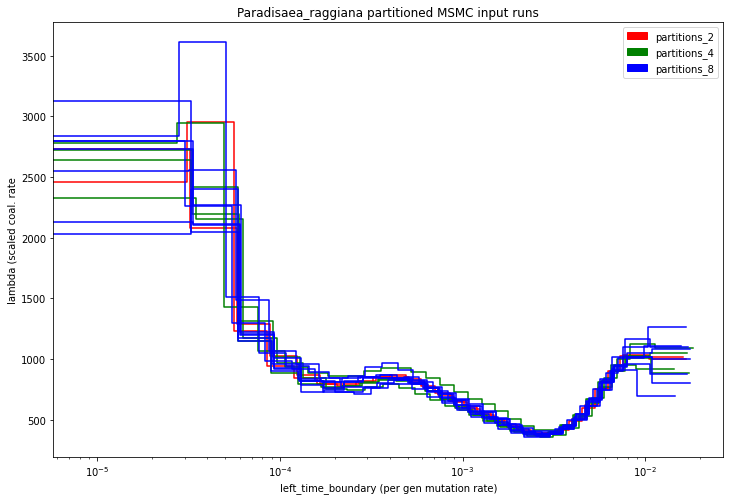

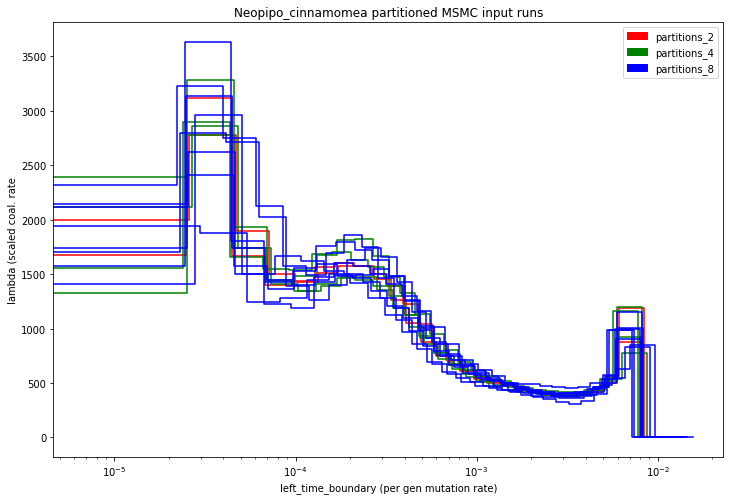

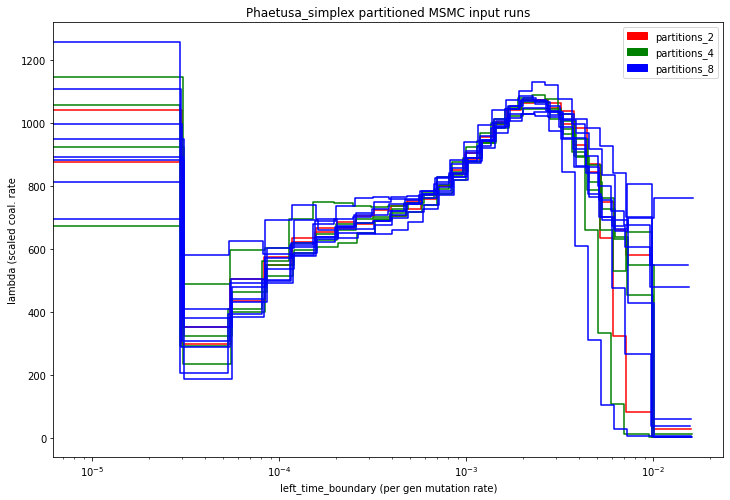

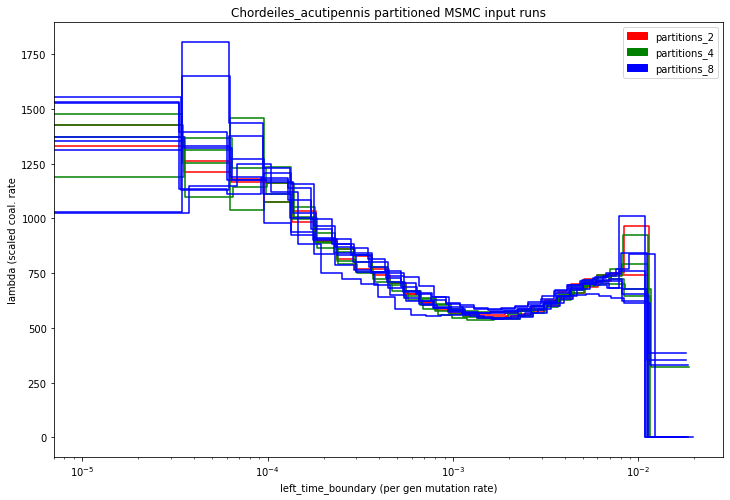

In [74]:
plot_partitioned_msmc(os.listdir())